In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = np.load('data/X.npy')[:1000]
y = np.load('data/Y.npy')[:1000]

In [4]:
print(x.shape)
print(y.shape)

(1000, 400)
(1000, 1)


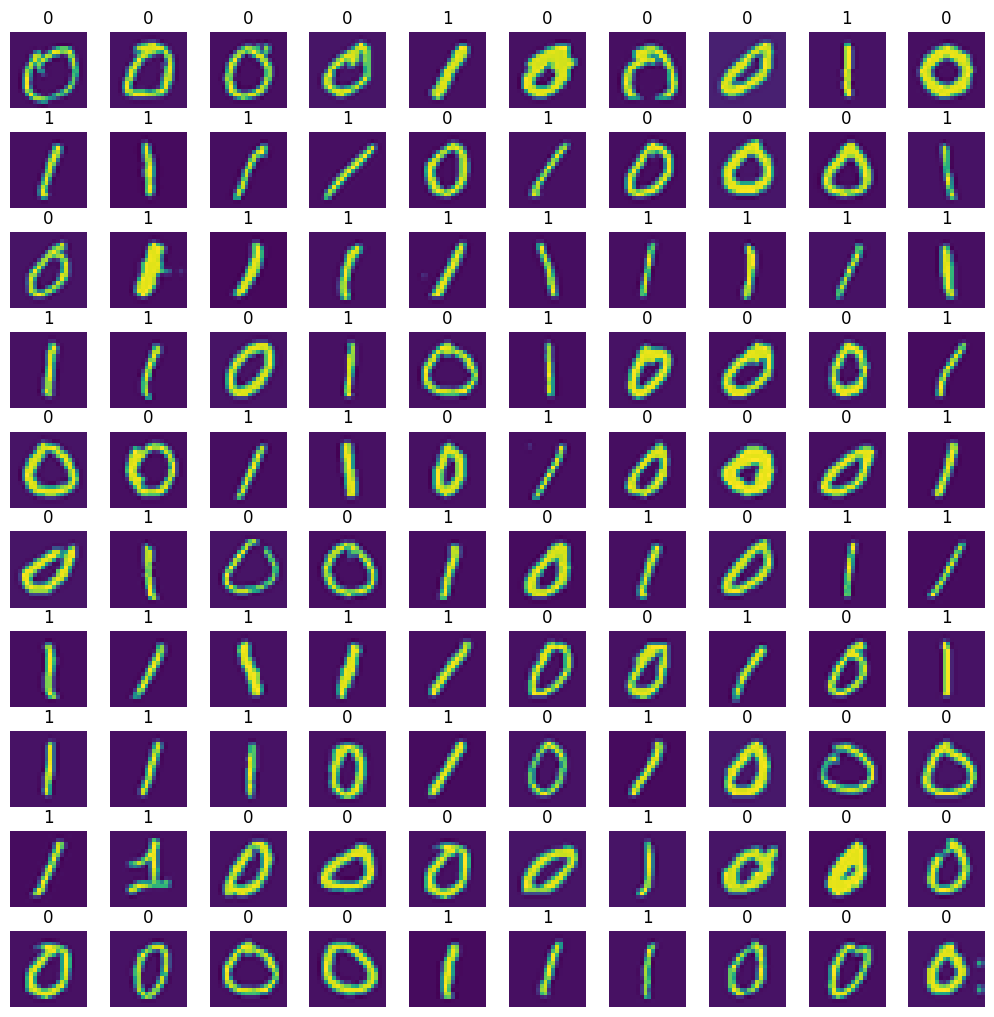

In [5]:
m,n = x.shape
fig,axes = plt.subplots(10,10,figsize=(10,10))
for i,ax in enumerate(axes.flat): #type:ignore
    randomIndex = np.random.randint(m)
    xReshaped = x[randomIndex].reshape(20,20).T
    ax.imshow(xReshaped)
    ax.set_title(y[randomIndex,0])
    ax.set_axis_off()
fig.tight_layout(pad=0.1)

In [6]:
model = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25,activation='sigmoid'),
    tf.keras.layers.Dense(15,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [8]:
layer1,layer2,layer3 = model.layers

In [9]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()

In [10]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)
model.fit(x,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 4s 7ms/step - loss: 0.8682
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6360
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4895
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3791
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2943
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2313
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1860
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1290
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1101
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0953
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 13/20
32/32 [==============================

In [11]:
prediction = model.predict(x[0].reshape(1,400))
print(prediction[0,0])

1/1 [==============================] - 0s 169ms/step
0.018180512


In [12]:
if prediction >= 0.5:
        yhat = 1
else:
        yhat = 0
print(f'Prediction after Threshold: {yhat}')

Prediction after Threshold: 0


1/1 [==============================] - 0s 31ms/step


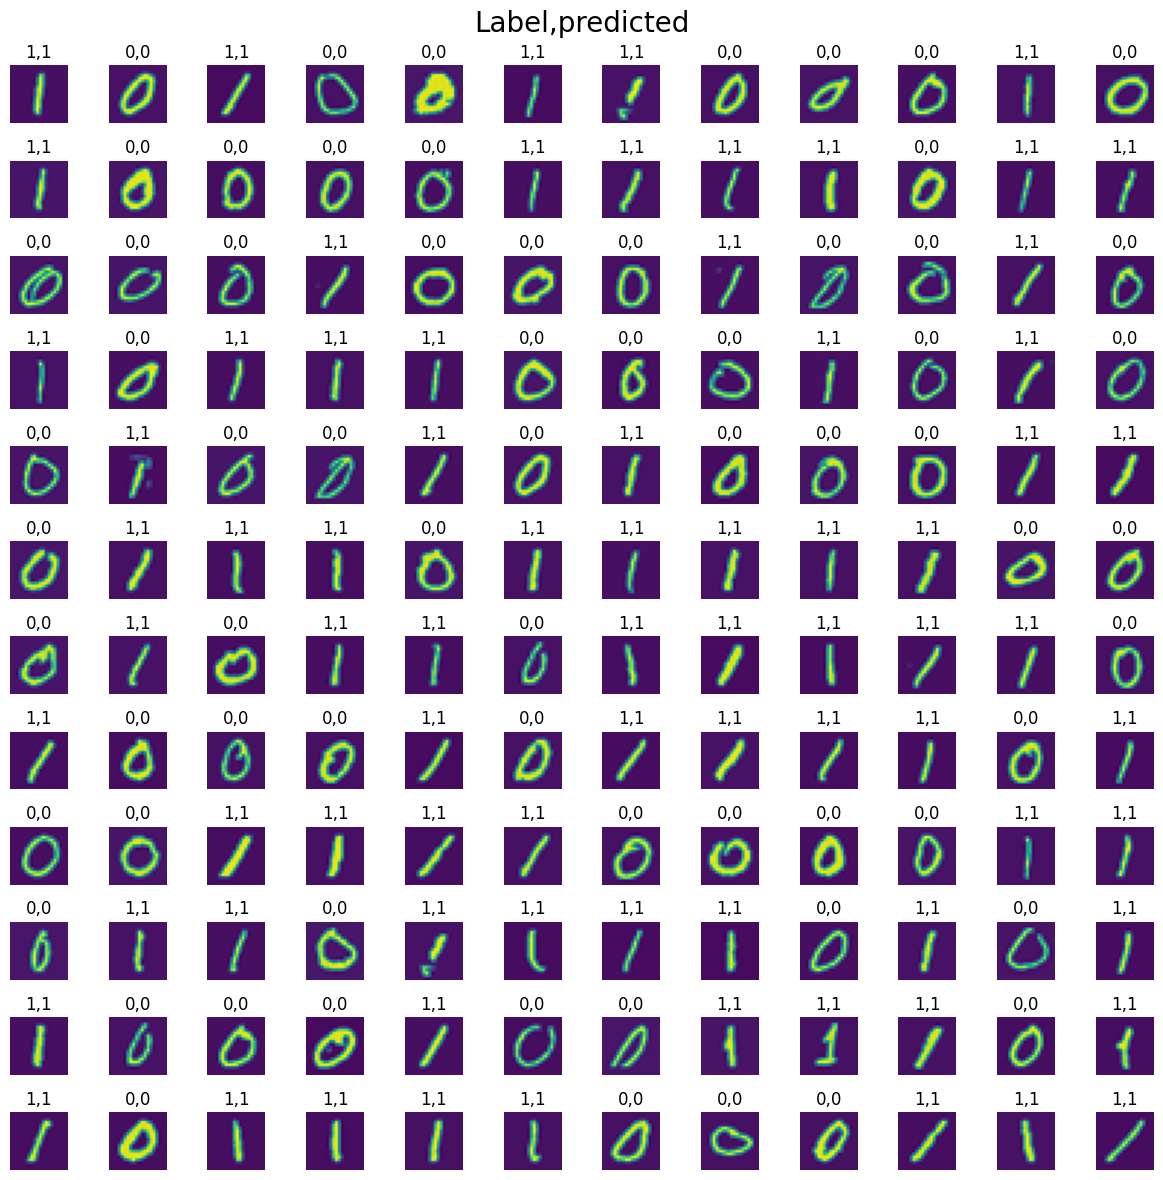

In [13]:
fig,axes = plt.subplots(12,12,figsize=(12,12))
for i,ax in enumerate(axes.flat): # type:ignore
    randomIndex = np.random.randint(m)
    xReshaped = x[randomIndex].reshape(20,20).T
    ax.imshow(xReshaped)
    prediction = model.predict(x[randomIndex].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    ax.set_title(f'{y[randomIndex,0]},{yhat}')
    ax.set_axis_off()
fig.suptitle('Label,predicted',fontsize=20)
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 41ms/step
Correct prediction of image no. 1
1/1 [==============================] - 0s 50ms/step
Correct prediction of image no. 2
1/1 [==============================] - 0s 54ms/step
Correct prediction of image no. 3
1/1 [==============================] - 0s 36ms/step
Correct prediction of image no. 4
1/1 [==============================] - 0s 44ms/step
Correct prediction of image no. 5
1/1 [==============================] - 0s 34ms/step
Correct prediction of image no. 6
1/1 [==============================] - 0s 34ms/step
Correct prediction of image no. 7
1/1 [==============================] - 0s 34ms/step
Correct prediction of image no. 8
1/1 [==============================] - 0s 32ms/step
Correct prediction of image no. 9
1/1 [==============================] - 0s 34ms/step
Correct prediction of image no. 10
1/1 [==============================] - 0s 33ms/step
Correct prediction of image no. 11
1/1 [==============================] - 0s 35ms/step


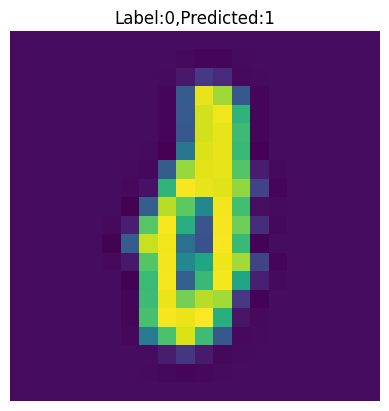

1/1 [==============================] - 0s 39ms/step
Correct prediction of image no. 144
1/1 [==============================] - 0s 32ms/step
Correct prediction of image no. 145
1/1 [==============================] - 0s 31ms/step
Correct prediction of image no. 146
1/1 [==============================] - 0s 30ms/step
Correct prediction of image no. 147
1/1 [==============================] - 0s 36ms/step
Correct prediction of image no. 148
1/1 [==============================] - 0s 28ms/step
Correct prediction of image no. 149
1/1 [==============================] - 0s 31ms/step
Correct prediction of image no. 150
1/1 [==============================] - 0s 31ms/step
Correct prediction of image no. 151
1/1 [==============================] - 0s 29ms/step
Correct prediction of image no. 152
1/1 [==============================] - 0s 43ms/step
Correct prediction of image no. 153
1/1 [==============================] - 0s 30ms/step
Correct prediction of image no. 154
1/1 [===========================

In [14]:
for i in range(m):
    xReshaped = x[i].reshape(20,20)
    prediction = model.predict(x[i].reshape(1,400))
    if prediction>=0.5:
        yhat = 1
    else:
        yhat = 0
    if yhat != y[i,0]:
        print(f'Mismatch in Prediction of image no. {i+1}')
        plt.imshow(x[i].reshape(20,20).T)
        plt.title(f'Label:{y[i,0]},Predicted:{yhat}')
        plt.axis('off')
        plt.show()
    else:
        print(f'Correct prediction of image no. {i+1}')